In [72]:
import typing

import polyflexmd.data_analysis.plot.msd as plot_msd
import polyflexmd.experiment_runner.config as config
import polyflexmd.data_analysis.theory.kremer_grest as kremer_grest
import polyflexmd.data_analysis.transform.transform as transform
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from pandarallel import pandarallel
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set_style("darkgrid")

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH_REL_ETE = "data/processed/ete.csv"

In [3]:
def aggregate_time_mean_ete(df_ete: pd.DataFrame, time_bucket_size: int, var_index: list[str]) -> pd.DataFrame:
    df_ete_agg =  df_ete.groupby(var_index+["molecule-ID", df_ete.index.get_level_values("t") // time_bucket_size], as_index=True).agg(np.mean)
    df_ete_agg.reset_index(level="t", drop=False, inplace=True)
    df_ete_agg["t"] = df_ete_agg["t"]*time_bucket_size
    df_ete_agg.set_index("t", append=True, inplace=True)
    return df_ete_agg


def get_dataset_ete_equi(
        conf: config.ExperimentConfig,
        experiment_path: pathlib.Path,
        var_index: list[str]
) -> pd.DataFrame:
    df = pd.read_csv(experiment_path / PATH_REL_ETE, index_col=var_index + ["molecule-ID", "t"])
    return df.loc[df.index.get_level_values("t") >= conf.simulation_config.variables["n_relax_steps"]]

## EEA1+Rab5

In [5]:
PATH_EXPERIMENT_CONNECTED = pathlib.Path("/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring-vary-l_K-vary-d_end/13-EEA1_short+Rab5_10x-long_time/7ded95ff")
PATH_EXPERIMENT_CONNECTED

PosixPath('/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring-vary-l_K-vary-d_end/13-EEA1_short+Rab5_10x-long_time/7ded95ff')

In [6]:
CONF_CONNECTED = config.read_experiment_config(PATH_EXPERIMENT_CONNECTED / "13-EEA1_short+Rab5_10x-long_time.toml")
CONF_CONNECTED

ExperimentConfig(simulation_config=SimulationConfig(job=SlurmJobConfig(account='p_mdpolymer', time='144:00:00', partition='romeo', nodes=1, tasks_per_node=125, ntasks=125, cpus_per_task=1, mem_per_cpu=1000), lammps_executable='/scratch/ws/0/s4610340-bt-eea1-md-workspace/bin/lammps-patch_23Jun2022_update4/lmp_omp_romeo_opt', lmod_modules='modenv/hiera GCC/11.3.0 OpenMPI/4.1.4 Python/3.9.6', simulation_model_path=PosixPath('simulations/FENE-beadspring-vary-l_K-vary-d_end.lammps'), experiments_path=PosixPath('/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results'), n_partitions=1, n_tasks_per_partition=125, variables={'kappa_start': 190.2, 'kappa_delta': 0.0, 'kappa_n_values': 1, 'm_end': 1.5, 'd_end_start': 15, 'd_end_delta': 0.0, 'd_end_n_values': 1, 'n_relax_steps': 20000000, 'n_equilibrium_steps': 500000000}), initial_system_config=SystemCreatorConfig(system_type='create', job=SlurmJobConfig(account='p_mdpolymer', time='1:00:00', partition='romeo', nodes=1, tasks_per_nod

### Get data

#### ETE

In [7]:
df_ete_conn = aggregate_time_mean_ete(get_dataset_ete_equi(CONF_CONNECTED, PATH_EXPERIMENT_CONNECTED, var_index=["kappa", "d_end"]), time_bucket_size=10, var_index=["kappa", "d_end"])
df_ete_conn

R_x       R_y      R_z          R
kappa d_end molecule-ID t                                               
190.2 15.0  1           20000000   21.1113   3.33798 -51.8683  56.099462
                        20010000   22.3715   3.32621 -50.5283  55.359342
                        20020000   23.9349   1.88956 -48.7609  54.351405
                        20030000   23.1916   2.45618 -52.5876  57.526853
                        20040000   21.0607   3.62511 -53.9827  58.058819
...                                    ...       ...      ...        ...
            50          519960000  44.0820  -8.76189  35.9279  57.539616
                        519970000  46.7452  -9.84358  34.4316  58.885863
                        519980000  48.8575  -8.73757  33.7101  59.998094
                        519990000  47.8816  -9.66420  34.1878  59.622563
                        520000000  47.3523 -10.58040  33.7882  59.125524

[2500050 rows x 4 columns]

#### Main axis

In [17]:
df_main_ax_conn = pd.read_csv(
    PATH_EXPERIMENT_CONNECTED / "data" / "processed" / "main_axis.csv"
).groupby("molecule-ID", as_index=True).nth(1)
df_main_ax_conn

,type,x,y,z,ix,iy,iz
molecule-ID,,,,,,,
1,1,-0.159927,-0.017451,-0.956566,0,0,0
2,1,-0.483684,-0.375608,0.752242,0,0,0
3,1,-0.036845,0.008633,0.969262,0,0,0
4,1,-0.050426,0.667705,-0.701803,0,0,0
5,1,-0.117898,0.182993,0.945258,0,0,0
6,1,-0.346460,0.808431,0.409028,0,0,0
7,1,0.927570,0.192853,-0.208138,0,0,0
8,1,0.055847,0.046707,-0.967264,0,0,0
9,1,-0.842575,0.402234,0.263012,0,0,0


#### Kuhn length $l_K$

In [9]:
l_K_estimate_conn: pd.Series = pd.read_csv(PATH_EXPERIMENT_CONNECTED / "data" / "processed" / "l_K-estimate.csv").iloc[0]
l_K_estimate_conn

kappa    190.200000
d_end     15.000000
l_K      381.557725
d_l_K      0.057164
Name: 0, dtype: float64

#### Bond length $l_b$

In [10]:
l_b = CONF_CONNECTED.initial_system_config.system_config.bond_length
l_b

0.97

#### Contour length L

In [11]:
L_contour = l_b*(CONF_CONNECTED.initial_system_config.system_config.n_monomers-1)
L_contour

61.11

#### End monomer mass

In [12]:
m_end_conn = CONF_CONNECTED.simulation_config.variables["m_end"]
m_end_conn

1.5

#### Friction coefficient of end monomer $\zeta_e$

In [13]:
zeta_end_conn = l_K_estimate_conn["d_end"] / m_end_conn
zeta_end_conn

10.0

#### MSD

In [14]:
def with_transformed_time_msd_df(df_msd: pd.DataFrame):
    df_msd["t/LJ"] = df_msd.index.get_level_values("t").map(lambda t: t*0.0025)
    df_msd["t/LJ"] = df_msd["t/LJ"] - df_msd["t/LJ"].min()

In [15]:
df_msd_conn = transform.calculate_ens_avg_df_ete_change_kappas_dend(df_ete_conn)
with_transformed_time_msd_df(df_msd_conn)
df_msd_conn

,dR^2,kappa,d_end,t/LJ
t,,,,
20000000,0.000000,190.2,15.0,0.0
20010000,7.470236,190.2,15.0,25.0
20020000,12.636747,190.2,15.0,50.0
20030000,15.733537,190.2,15.0,75.0
20040000,19.781031,190.2,15.0,100.0
...,...,...,...,...
519960000,1154.704684,190.2,15.0,1249900.0
519970000,1161.786071,190.2,15.0,1249925.0
519980000,1160.750226,190.2,15.0,1249950.0


#### MSD by dimension in main-axis coordinate system

In [63]:
def change_basis_df_ete(df_ete: pd.DataFrame, df_main_axis: pd.DataFrame):
    dims = ["x", "y", "z"]
    dims_R = ["R_x", "R_y", "R_z"]
    dfs = []
    for mol_id, df_mol in df_ete.groupby("molecule-ID"):
        vec_axs = df_main_axis.loc[mol_id][dims].to_numpy()
        basis_new = transform.create_orthogonal_basis_with_given_vector(vec_axs)
        R_vecs = []
        for R_vec in df_mol[dims_R].to_numpy():
            R_vec_new = transform.basis_change_from_cartesian(basis_new, R_vec)
            R_vecs.append(R_vec_new)
        df_mol[dims_R] = R_vecs
        dfs.append(df_mol)

    return pd.concat(dfs)

df_ete_conn_main_ax_frame = change_basis_df_ete(df_ete_conn, df_main_ax_conn)
df_ete_conn_main_ax_frame

R_x       R_y        R_z          R
kappa d_end molecule-ID t                                                   
190.2 15.0  1           20000000   29.362627  4.283498  47.609216  56.099462
                        20010000   30.384723  4.247288  46.080212  55.359342
                        20020000   31.639699  2.778640  44.105372  54.351405
                        20030000   31.535683  3.414964  47.991432  57.526853
                        20040000   29.660406  4.609146  49.697510  58.058819
...                                      ...       ...        ...        ...
            50          519960000   5.415795  5.652452  57.004617  57.539616
                        519970000   8.288972  6.858326  57.894742  58.885863
                        519980000  10.359284  5.818177  58.809908  59.998094
                        519990000   9.276100  6.700487  58.514165  59.622563
                        520000000   9.126943  7.647546  57.914088  59.125524

[2500050 rows x 4 columns]

In [64]:
def calculate_MSD_by_dimension(
        df_ete_step: pd.DataFrame,
        df_ete_step_0: pd.DataFrame,
        dimensions: list[str]
) -> pd.Series:
    df_ete_step_vec = df_ete_step[dimensions].to_numpy()
    df_ete_step_0_vec = df_ete_step_0[dimensions].to_numpy()
    MSD_dims = (df_ete_step_vec - df_ete_step_0_vec)**2
    MSD_dims_avg = MSD_dims.mean(axis=0)
    MSD_vec_avg = np.sum(MSD_dims, axis=1).mean()
    return pd.Series([*MSD_dims_avg, MSD_vec_avg], index=["dR_x^2", "dR_y^2", "dR_z^2", "dR^2"])

def calculate_MSD_by_dimension_df(
        df_ete: pd.DataFrame,
        group_by_params: list[str],
        time_param: str="t",
        dimensions: tuple[str, str, str] = ("R_x", "R_y", "R_z")
) -> pd.DataFrame:
    df_ete = df_ete.reset_index(drop=False).drop("R", axis=1)
    dfs = []
    for params, df_group in df_ete.groupby(group_by_params):
        t_min = df_group[time_param].min()
        df_group_t_0 = df_group.loc[df_group["t"] == t_min]
        df_group_MSD = df_group.groupby(time_param).apply(
            calculate_MSD_by_dimension,
            df_ete_step_0=df_group_t_0,
            dimensions=list(dimensions)
        )
        df_group_MSD[group_by_params] = params
        dfs.append(df_group_MSD)

    return pd.concat(dfs)

df_msd_conn_main_ax_frame = calculate_MSD_by_dimension_df(df_ete_conn_main_ax_frame, ["kappa", "d_end"])
with_transformed_time_msd_df(df_msd_conn_main_ax_frame)
df_msd_conn_main_ax_frame

,dR_x^2,dR_y^2,dR_z^2,dR^2,kappa,d_end,t/LJ
t,,,,,,,
20000000,0.000000,0.000000,0.000000,0.000000,190.2,15.0,0.0
20010000,2.898899,2.994696,1.576640,7.470236,190.2,15.0,25.0
20020000,4.514461,5.120999,3.001287,12.636747,190.2,15.0,50.0
20030000,5.868033,6.269695,3.595809,15.733537,190.2,15.0,75.0
20040000,8.791513,6.894694,4.094824,19.781031,190.2,15.0,100.0
...,...,...,...,...,...,...,...
519960000,569.809556,484.192972,100.702155,1154.704684,190.2,15.0,1249900.0
519970000,569.071696,494.276685,98.437691,1161.786071,190.2,15.0,1249925.0
519980000,563.848414,496.323882,100.577930,1160.750226,190.2,15.0,1249950.0


### Explore

#### Plot MSD

<Axes: title={'center': 'MSD for $l_K/L=6.24$, $\\zeta_e=10.0$, $\\zeta=1.0$, $L=61.11$'}, xlabel='t/LJ', ylabel='$ \\sqrt {{\\langle (\\Delta R(t))^2 \\rangle}} / L$'>

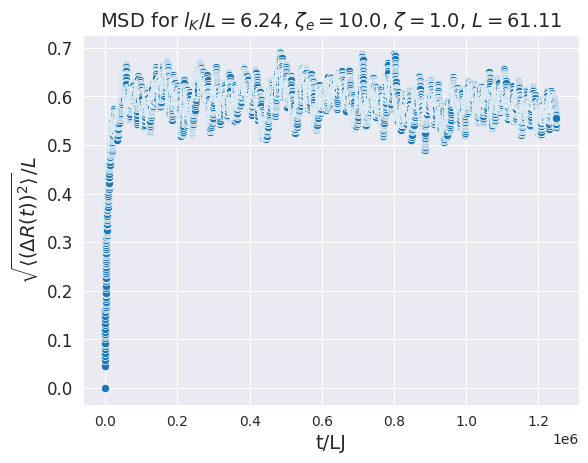

In [74]:
plot_msd.plot_MSD(df_msd_conn_main_ax_frame, log_scale=False, l_K=l_K_estimate_conn["l_K"], L_contour=L_contour, zeta=1.0, zeta_e=zeta_end_conn)

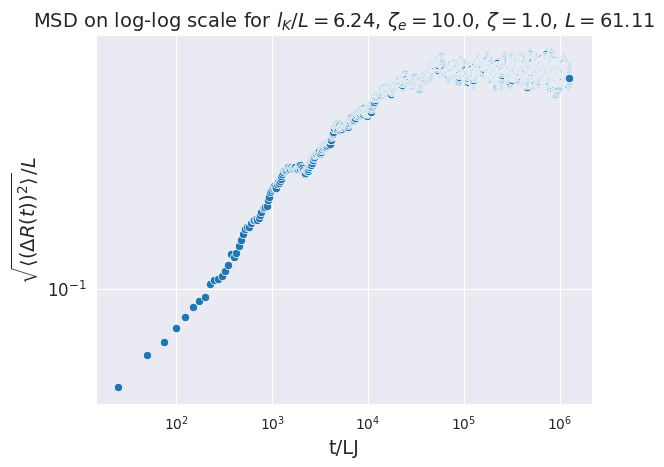

In [66]:
plot_msd.plot_MSD(df_msd_conn, log_scale=True, l_K=l_K_estimate_conn["l_K"], L_contour=L_contour, zeta=1.0, zeta_e=zeta_end_conn)

#### Plot MSD dimensions

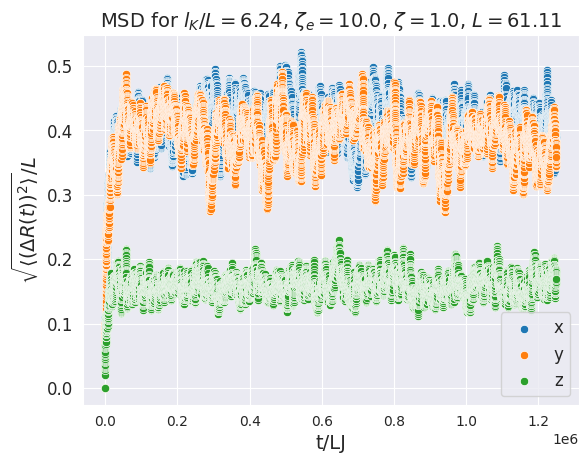

In [77]:
dims = ["x", "y", "z"]
for dim in dims:
    plot_msd.plot_MSD(
        df_msd_conn_main_ax_frame,
        log_scale=False,
        label=dim,
        col=f"dR_{dim}^2",
        l_K=l_K_estimate_conn["l_K"],
        L_contour=L_contour,
        zeta=1.0,
        zeta_e=zeta_end_conn
    )

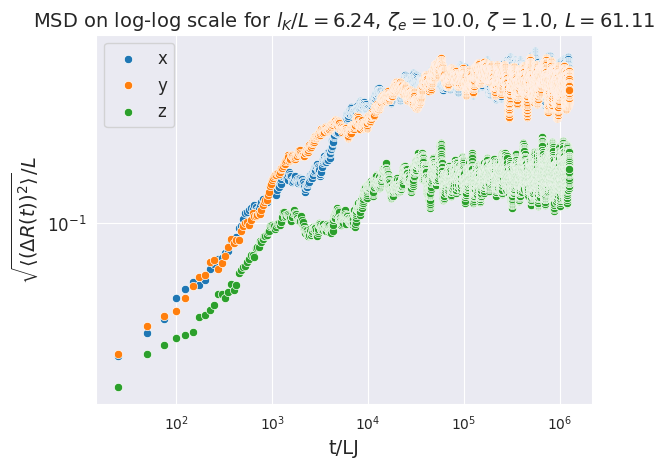

In [78]:
dims = ["x", "y", "z"]
for dim in dims:
    plot_msd.plot_MSD(
        df_msd_conn_main_ax_frame,
        log_scale=True,
        label=dim,
        col=f"dR_{dim}^2",
        l_K=l_K_estimate_conn["l_K"],
        L_contour=L_contour,
        zeta=1.0,
        zeta_e=zeta_end_conn
    )

## Bare EEA1

In [84]:
PATH_EXPERIMENT_BARE = pathlib.Path("/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring-vary-l_K/12-EEA1_short-long_time/7ded95ff")
PATH_EXPERIMENT_BARE

PosixPath('/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring-vary-l_K/12-EEA1_short-long_time/7ded95ff')

In [85]:
CONF_BARE = config.read_experiment_config(PATH_EXPERIMENT_BARE / "12-EEA1_short-long_time-rendered.toml")
CONF_BARE

ExperimentConfig(simulation_config=SimulationConfig(job=SlurmJobConfig(account='p_mdpolymer', time='144:00:00', partition='romeo', nodes=1, tasks_per_node=125, ntasks=125, cpus_per_task=1, mem_per_cpu=1000), lammps_executable='/scratch/ws/0/s4610340-bt-eea1-md-workspace/bin/lammps-patch_23Jun2022_update4/lmp_omp_romeo_opt', lmod_modules='modenv/hiera GCC/11.3.0 OpenMPI/4.1.4 Python/3.9.6', simulation_model_path=PosixPath('simulations/FENE-beadspring-vary-l_K.lammps'), experiments_path=PosixPath('/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results'), n_partitions=1, n_tasks_per_partition=125, variables={'kappa_start': 190.2, 'kappa_delta': 0.0, 'kappa_n_values': 1, 'n_relax_steps': 35000000, 'n_equilibrium_steps': 500000000}), initial_system_config=SystemCreatorConfig(system_type='create', job=SlurmJobConfig(account='p_mdpolymer', time='1:00:00', partition='romeo', nodes=1, tasks_per_node=1, ntasks=1, cpus_per_task=2, mem_per_cpu=2000), venv_path=PosixPath('/scratch/ws/0

### Get data

#### ETE

In [86]:
df_ete_bare = aggregate_time_mean_ete(
    get_dataset_ete_equi(CONF_BARE, PATH_EXPERIMENT_BARE, var_index=["kappa"]),
    time_bucket_size=10,
    var_index=["kappa"]
)
df_ete_bare

R_x       R_y      R_z          R
kappa molecule-ID t                                               
190.2 1           35000000  -11.2090 -18.61880  54.2396  58.431461
                  35010000  -12.1431 -15.40350  54.8017  58.206091
                  35020000  -10.6825 -10.82600  57.7616  59.730399
                  35030000  -11.9759 -11.76350  56.9861  59.407219
                  35040000  -11.4731  -7.79221  57.9553  59.591672
...                              ...       ...      ...        ...
      50          534960000 -21.5631  36.43180 -43.0082  60.348559
                  534970000 -21.3312  34.18480 -44.2859  59.873714
                  534980000 -21.5255  33.97930 -44.6883  60.124738
                  534990000 -14.1611  37.88690 -41.9876  58.300193
                  535000000 -14.9624  36.15070 -41.7827  57.241074

[2500050 rows x 4 columns]

#### Other

In [101]:
df_main_ax_bare = pd.read_csv(
    PATH_EXPERIMENT_BARE / "data" / "processed" / "main_axis.csv"
).groupby("molecule-ID", as_index=True).nth(1)
df_main_ax_bare

,type,x,y,z,ix,iy,iz
molecule-ID,,,,,,,
1,1,-0.336178,0.186169,0.890632,0,0,0
2,1,-0.272215,-0.119898,0.923268,0,0,0
3,1,-0.517323,-0.532615,-0.624178,0,0,0
4,1,0.302546,-0.396453,0.831980,0,0,0
5,1,-0.592061,0.192979,0.743722,0,0,0
6,1,0.603412,-0.046465,-0.758047,0,0,0
7,1,-0.935697,-0.211786,0.143242,0,0,0
8,1,-0.833386,-0.344046,-0.357770,0,0,0
9,1,-0.691150,-0.622307,-0.275583,0,0,0


In [87]:
l_b = CONF_BARE.initial_system_config.system_config.bond_length
l_b

0.97

In [88]:
kappa = CONF_BARE.simulation_config.variables["kappa_start"]
kappa

190.2

In [89]:
l_K_bare = kremer_grest.bare_kuhn_length(kappa, l_b=l_b)
l_K_bare

368.018

#### MSD

In [90]:
df_msd_bare = transform.calculate_ens_avg_df_ete_change_kappas(df_ete_bare)
with_transformed_time_msd_df(df_msd_bare)
df_msd_bare

,dR^2,kappa,t/LJ
t,,,
35000000,0.000000,190.2,0.0
35010000,20.286877,190.2,25.0
35020000,32.160526,190.2,50.0
35030000,34.070045,190.2,75.0
35040000,53.275140,190.2,100.0
...,...,...,...
534960000,1324.074449,190.2,1249900.0
534970000,1300.425401,190.2,1249925.0
534980000,1337.994253,190.2,1249950.0


#### MSD by dimension in main-axis c-system

In [102]:
df_ete_bare_main_ax_frame = change_basis_df_ete(df_ete_bare, df_main_ax_bare)
df_ete_bare_main_ax_frame

R_x        R_y        R_z          R
kappa molecule-ID t                                                    
190.2 1           35000000    6.565824  29.322778  50.112875  58.431461
                  35010000    6.108310  26.290512  51.569822  58.206091
                  35020000    8.807112  22.415474  54.659874  59.730399
                  35030000    7.264311  23.174466  54.216156  59.407219
                  35040000    8.346356  19.485500  55.693994  59.591672
...                                ...        ...        ...        ...
      50          534960000  14.722857 -10.115419  57.644292  60.348559
                  534970000  14.372954 -12.528882  56.756558  59.873714
                  534980000  14.271110 -12.970277  56.948147  60.124738
                  534990000  21.020516  -8.403222  53.725565  58.300193
                  535000000  19.512510  -9.346751  52.994724  57.241074

[2500050 rows x 4 columns]

In [105]:
df_msd_bare_main_ax_frame = calculate_MSD_by_dimension_df(df_ete_bare_main_ax_frame, ["kappa"])
with_transformed_time_msd_df(df_msd_bare_main_ax_frame)
df_msd_bare_main_ax_frame

/tmp/ipykernel_73792/2696046585.py:21: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for params, df_group in df_ete.groupby(group_by_params):


,dR_x^2,dR_y^2,dR_z^2,dR^2,kappa,t/LJ
t,,,,,,
35000000,0.000000,0.000000,0.000000,0.000000,190.2,0.0
35010000,7.196310,8.846746,4.243820,20.286877,190.2,25.0
35020000,12.388928,14.514962,5.256636,32.160526,190.2,50.0
35030000,12.374909,16.069472,5.625665,34.070045,190.2,75.0
35040000,17.152237,26.199318,9.923585,53.275140,190.2,100.0
...,...,...,...,...,...,...
534960000,715.844872,525.375892,82.853685,1324.074449,190.2,1249900.0
534970000,718.545714,503.703275,78.176412,1300.425401,190.2,1249925.0
534980000,755.800653,505.171638,77.021963,1337.994253,190.2,1249950.0


### Explore

#### Plot MSD

<Axes: title={'center': 'MSD for $l_K/L=6.02$, $\\zeta_e = \\zeta= 1.00$, $L=61.11$'}, xlabel='t/LJ', ylabel='$ \\sqrt {{\\langle (\\Delta R(t))^2 \\rangle}} / L$'>

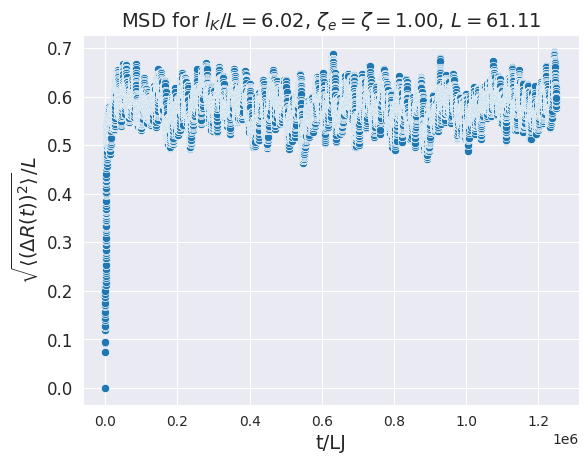

In [106]:
plot_msd.plot_MSD(df_msd_bare_main_ax_frame, log_scale=False, l_K=l_K_bare, L_contour=L_contour, zeta_e=1.0, zeta=1.0)

<Axes: title={'center': 'MSD on log-log scale for $l_K/L=6.02$, $\\zeta_e = \\zeta= 1.00$, $L=61.11$'}, xlabel='t/LJ', ylabel='$ \\sqrt {{\\langle (\\Delta R(t))^2 \\rangle}} / L$'>

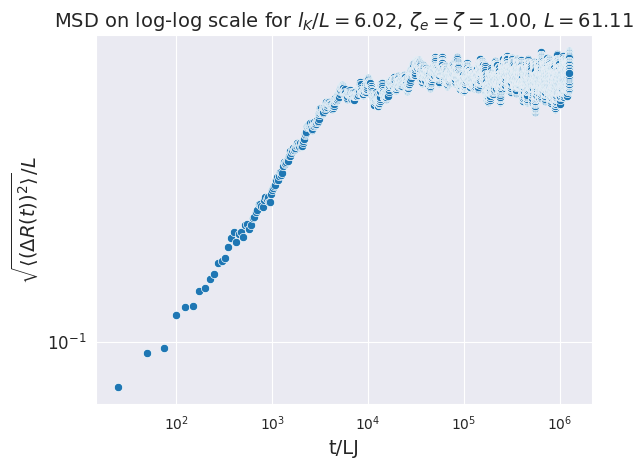

In [107]:
plot_msd.plot_MSD(df_msd_bare_main_ax_frame, log_scale=True, l_K=l_K_bare, L_contour=L_contour, zeta_e=1.0, zeta=1.0)

#### Plot MSD dimensions

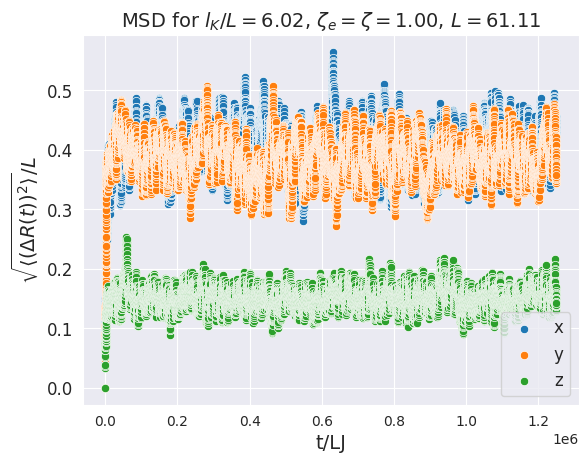

In [108]:
for dim in dims:
    plot_msd.plot_MSD(
        df_msd_bare_main_ax_frame,
        log_scale=False,
        label=dim,
        col=f"dR_{dim}^2",
        l_K=l_K_bare,
        L_contour=L_contour,
        zeta=1.0,
        zeta_e=1.0
    )


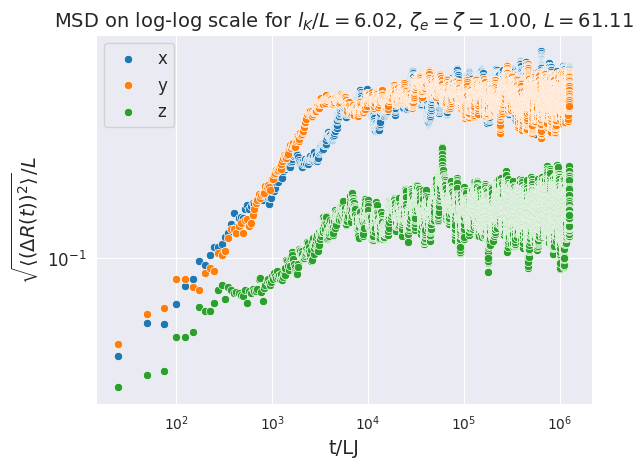

In [109]:
for dim in dims:
    plot_msd.plot_MSD(
        df_msd_bare_main_ax_frame,
        log_scale=True,
        label=dim,
        col=f"dR_{dim}^2",
        l_K=l_K_bare,
        L_contour=L_contour,
        zeta=1.0,
        zeta_e=1.0
    )

## Compare: EEA1+Rab5 vs EEA1

Text(0.3, 0.1, 'EEA1: $l_K/L =  6.02$ \nEEA1+Rab5: $l_K/L = 6.2438 \\pm 0.0009$ \n$\\Delta =  0.22L$')

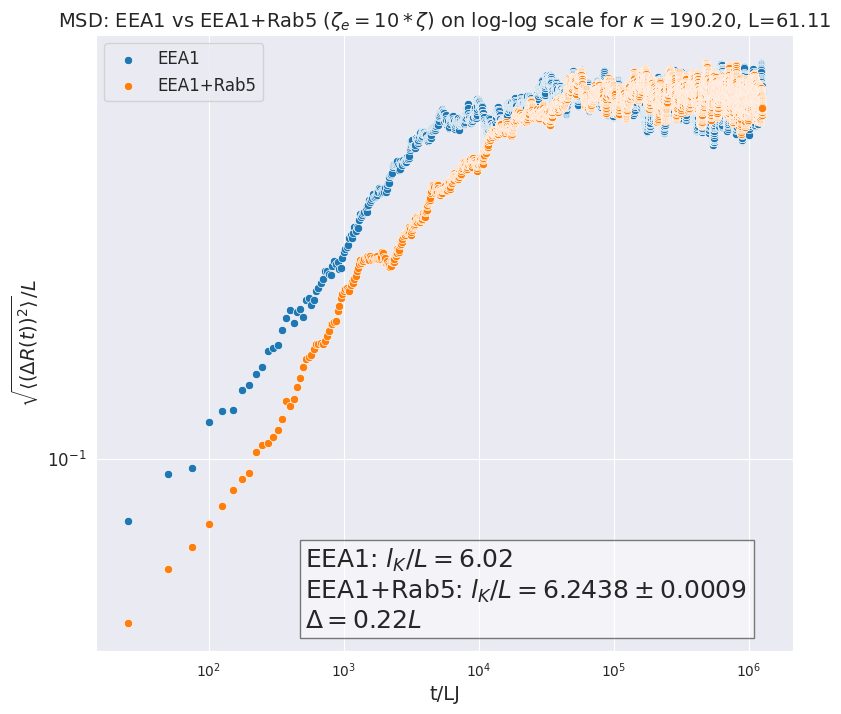

In [110]:
ax: plt.Axes
fig: plt.Figure

fig, ax = plt.subplots(figsize=(9,8))

plot_msd.plot_MSD(
    df_msd_bare_main_ax_frame,
    log_scale=True,
    l_K=l_K_bare,
    L_contour=L_contour,
    zeta_e=1.0,
    zeta=1.0,
    title="",
    ax=ax,
    label="EEA1",
)

plot_msd.plot_MSD(
    df_msd_conn_main_ax_frame,
    log_scale=True,
    l_K=l_K_estimate_conn["l_K"],
    L_contour=L_contour,
    zeta_e=zeta_end_conn,
    zeta=1.0,
    title="",
    ax=ax,
    label="EEA1+Rab5",
)

ax.set(
    title=f"MSD: EEA1 vs EEA1+Rab5 ($\zeta_e = 10*\zeta$) on log-log scale for $\kappa={kappa:.2f}$, L={L_contour:.2f}"
)

ax.text(
    x=.3,
    y=.1,
    s=f"EEA1: $l_K/L = {l_K_bare/L_contour : .2f}$ \n"
      f"EEA1+Rab5: $l_K/L = {l_K_estimate_conn['l_K']/ L_contour :.4f} \pm {l_K_estimate_conn['d_l_K']/ L_contour:.4f}$ \n"
      f"$\Delta = {(l_K_estimate_conn['l_K'] - l_K_bare)/L_contour : .2f}L$",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes,
    fontdict=dict(size=18),
    bbox=dict(edgecolor="black", alpha=0.5, facecolor="white")
)

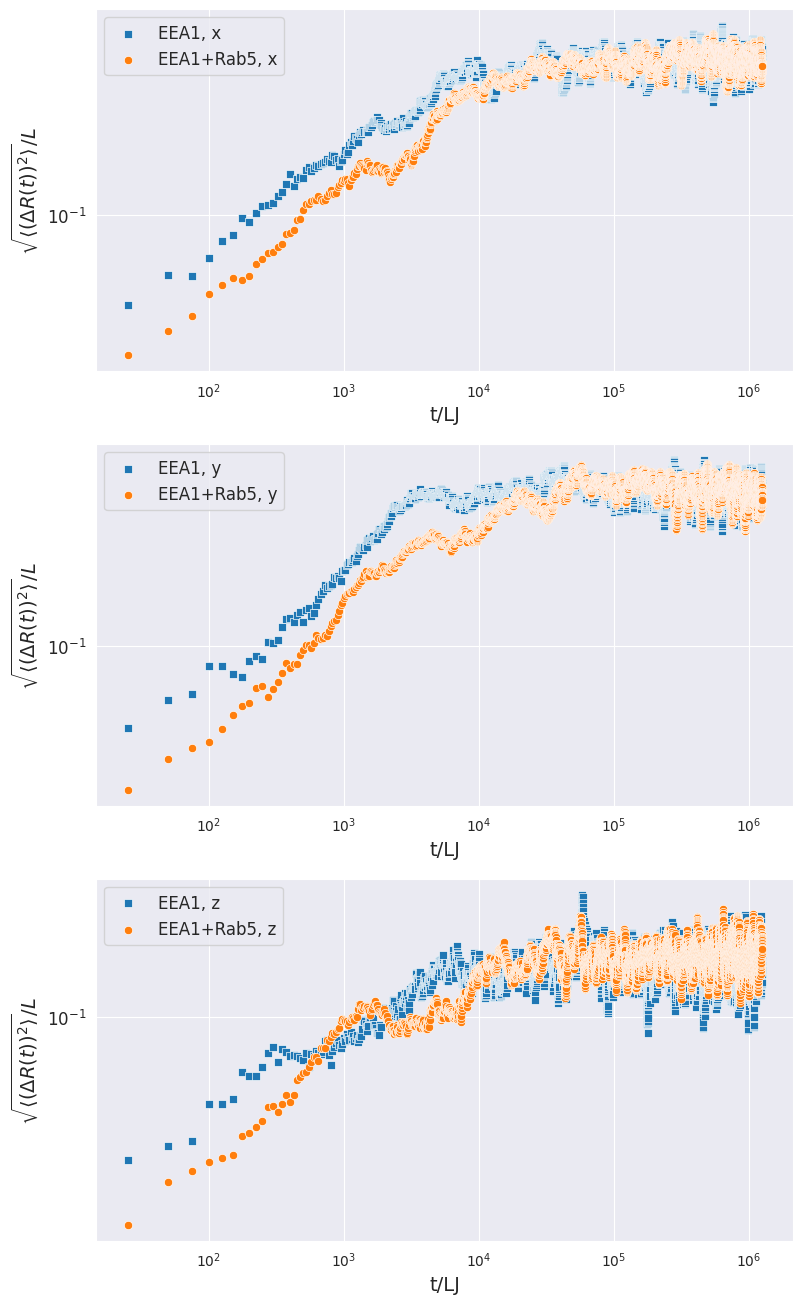

In [119]:
import matplotlib.markers

ax: plt.Axes
fig: plt.Figure

fig, axs = plt.subplots(nrows=3, figsize=(9,16))

colors = ["orange", "green", "blue"]

for dim, ax in zip(dims, axs):

    plot_msd.plot_MSD(
        df_msd_bare_main_ax_frame,
        col=f"dR_{dim}^2",
        log_scale=True,
        l_K=l_K_bare,
        L_contour=L_contour,
        zeta_e=1.0,
        zeta=1.0,
        title="",
        ax=ax,
        label=f"EEA1, {dim}",
        marker=matplotlib.markers.MarkerStyle(marker="s")
    )

    plot_msd.plot_MSD(
        df_msd_conn_main_ax_frame,
        log_scale=True,
        col=f"dR_{dim}^2",
        l_K=l_K_estimate_conn["l_K"],
        L_contour=L_contour,
        zeta_e=zeta_end_conn,
        zeta=1.0,
        title="",
        ax=ax,
        label=f"EEA1+Rab5, {dim}",
        marker=matplotlib.markers.MarkerStyle(marker="o")
    )


